In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
df = pd.read_csv(r"C:\Users\svire\Downloads\SalaryData_Test(1).csv")

In [21]:
df.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [22]:
df.shape

(15060, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [24]:
df['Salary'].value_counts()

Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

In [25]:
label_encoding = df.select_dtypes(exclude = ['int','float'])
print(label_encoding.columns)

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
for i in label_encoding:
    if i != 'Salary':
        print(i)
        df[i] = le.fit_transform(df[i])

workclass
education
maritalstatus
occupation
relationship
race
sex
native


In [28]:
df.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          2          1            7              4           6   
1   38          2         11            9              2           4   
2   28          1          7           12              2          10   
3   44          2         15           10              2           6   
4   34          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0   <=50K  
1   <=50K  
2    >50K  
3    >50K  
4   <=50K

In [29]:
df['Salary'].value_counts()

Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

In [30]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [31]:
 df['Salary']=df['Salary'].map({' <=50K':1,' >50K':0})

In [32]:
df['Salary'].unique()

array([1, 0], dtype=int64)

In [33]:
df.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          2          1            7              4           6   
1   38          2         11            9              2           4   
2   28          1          7           12              2          10   
3   44          2         15           10              2           6   
4   34          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0       1  
1       1  
2       0  
3       0  
4       1

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int64
dtypes: int32(8), int64(6)
memory usage: 1.1 MB


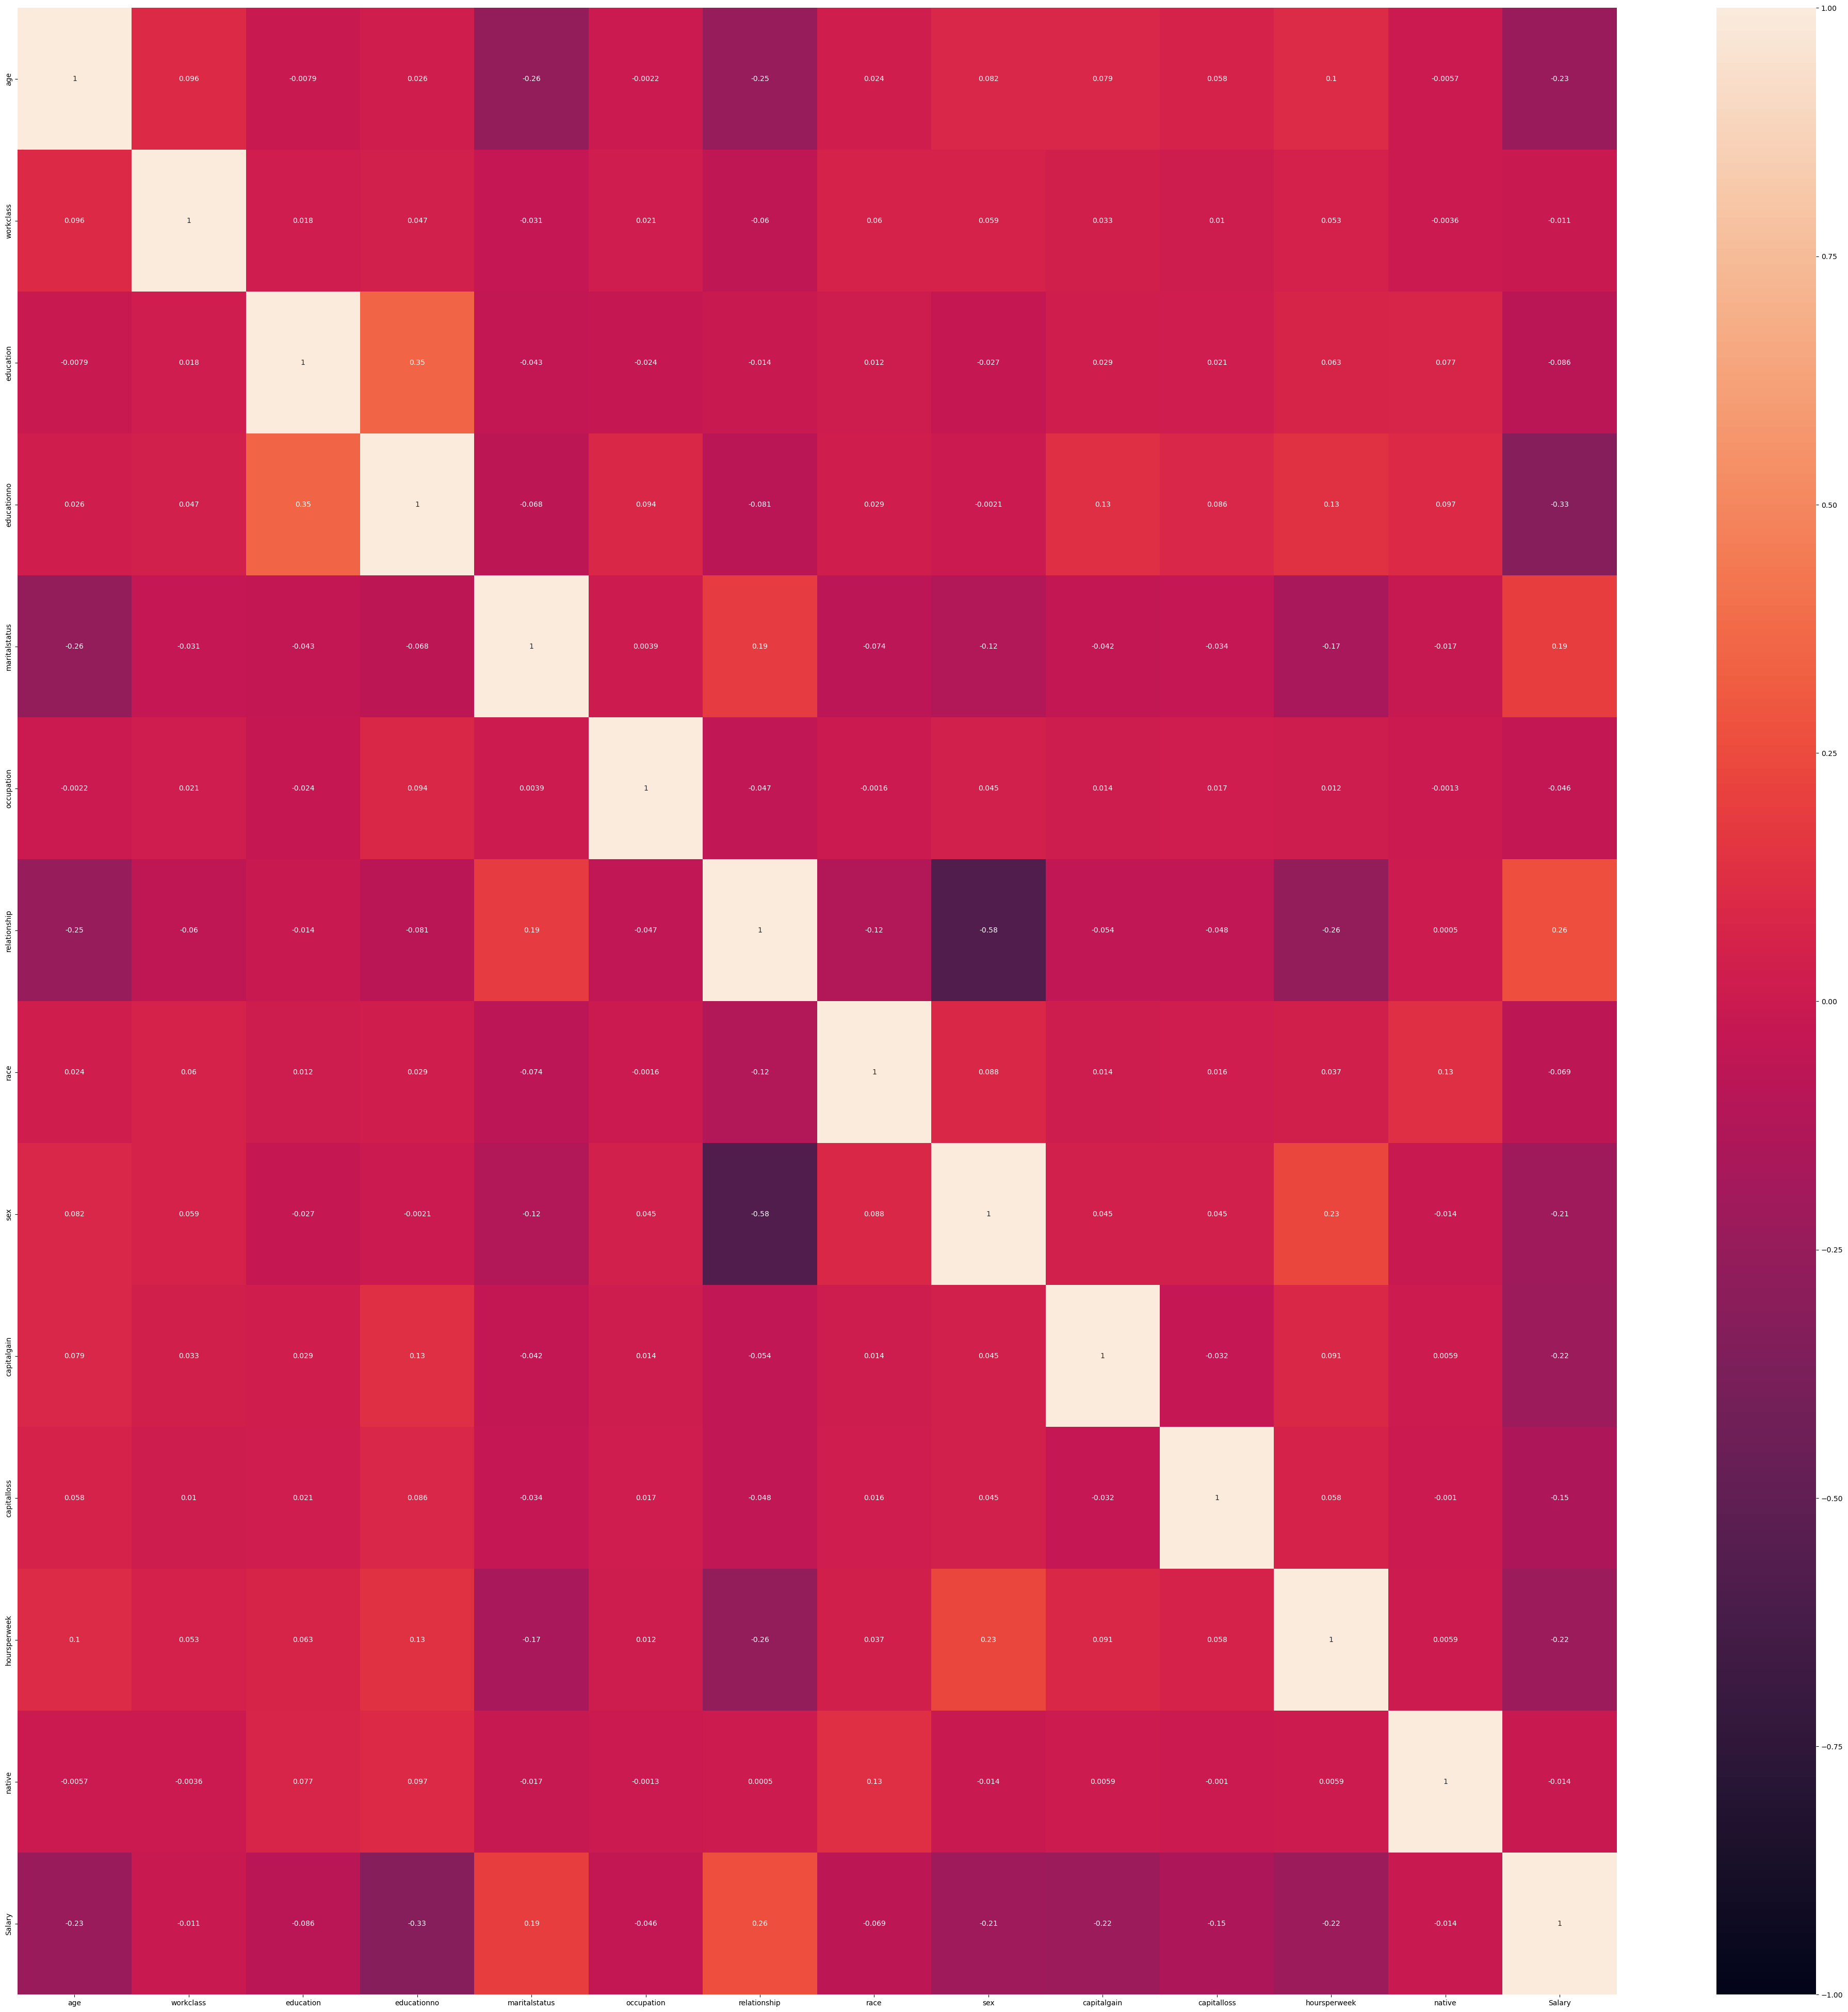

In [35]:
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(),vmin = -1,vmax = 1,annot = True)
plt.show()

In [36]:
x = df.drop(['Salary'],axis = 1) 
y = df['Salary']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [39]:
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)
logreg_train_pred = logreg_clf.predict(X_train)
print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))
print(confusion_matrix(logreg_prediction, Y_test))
print(classification_report(logreg_prediction, Y_test))

Accuracy 80.09%
Accuracy 80.50%
[[ 446  194]
 [ 687 3191]]
              precision    recall  f1-score   support

           0       0.39      0.70      0.50       640
           1       0.94      0.82      0.88      3878

    accuracy                           0.81      4518
   macro avg       0.67      0.76      0.69      4518
weighted avg       0.86      0.81      0.83      4518



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
ranfor_clf = RandomForestClassifier(n_estimators=50,max_depth = 5,max_features=7)
ranfor_model = ranfor_clf.fit(X_train, Y_train)
ranfor_prediction = ranfor_clf.predict(X_test)
ranfor_train_pred = ranfor_clf.predict(X_train)
print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Accuracy 84.90%
Accuracy 84.57%
[[ 627  191]
 [ 506 3194]]
              precision    recall  f1-score   support

           0       0.55      0.77      0.64       818
           1       0.94      0.86      0.90      3700

    accuracy                           0.85      4518
   macro avg       0.75      0.81      0.77      4518
weighted avg       0.87      0.85      0.85      4518



In [41]:
svm_clf = SVC(C=2.0,
    kernel='rbf',
    degree=5,
    gamma='scale',
    coef0=0.1,)
svm_model = svm_clf.fit(X_train, Y_train)
svm_prediction = svm_clf.predict(X_test)
svm_train_pred = svm_clf.predict(X_train)
print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_train_pred, Y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, Y_test)))
print(confusion_matrix(svm_prediction, Y_test))
print(classification_report(svm_prediction, Y_test))

Accuracy 79.74%
Accuracy 79.55%
[[ 314  105]
 [ 819 3280]]
              precision    recall  f1-score   support

           0       0.28      0.75      0.40       419
           1       0.97      0.80      0.88      4099

    accuracy                           0.80      4518
   macro avg       0.62      0.77      0.64      4518
weighted avg       0.90      0.80      0.83      4518

